### Customer churn prediction using ANN Classifications

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

## DATA PREPROCESSING

In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Now Remove Irrevelant columns

In [3]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## LABEL ENCODING

In [4]:
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


## One hot encoding 

In [5]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder()
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [6]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [7]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


### Now combine one hot data with the original data

In [8]:
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


#### Handling duplicate records

In [9]:
data = data.drop_duplicates()

In [11]:
import pickle

In [12]:
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)

In [13]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


## Select x (independent variable) and y (dependent variable) - Exited(1 or 0)

In [16]:
X=data.drop('Exited',axis=1)
Y=data['Exited']

In [17]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


In [18]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Split data into training and test data.

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,686,1,32,6,0.00,2,1,1,179093.26,1.0,0.0,0.0
1561,632,1,42,4,119624.60,2,1,1,195978.86,0.0,1.0,0.0
1670,559,1,24,3,114739.92,1,1,0,85891.02,0.0,0.0,1.0
6087,561,0,27,9,135637.00,1,1,0,153080.40,1.0,0.0,0.0
6669,517,1,56,9,142147.32,1,0,0,39488.04,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,1,54,8,69712.74,1,1,1,69381.05,1.0,0.0,0.0
5191,682,0,58,1,0.00,1,1,1,706.50,1.0,0.0,0.0
5390,735,0,38,1,0.00,3,0,0,92220.12,1.0,0.0,0.0
860,667,1,43,8,190227.46,1,1,0,97508.04,1.0,0.0,0.0


In [24]:
Y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [26]:
X_test

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
6252,596,1,32,3,96709.07,2,0,0,41788.37,0.0,1.0,0.0
4684,623,1,43,1,0.00,2,1,1,146379.30,1.0,0.0,0.0
1731,601,0,44,4,0.00,2,1,0,58561.31,0.0,0.0,1.0
4742,506,1,59,8,119152.10,2,1,1,170679.74,0.0,1.0,0.0
4521,560,0,27,7,124995.98,1,1,1,114669.79,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6412,602,0,53,5,98268.84,1,0,1,45038.29,0.0,1.0,0.0
8285,609,1,25,10,0.00,1,0,1,109895.16,1.0,0.0,0.0
7853,730,0,47,7,0.00,1,1,0,33373.26,1.0,0.0,0.0
1095,692,1,29,4,0.00,1,1,0,76755.99,1.0,0.0,0.0


In [27]:
Y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

### Now feature scaling

In [28]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [30]:
X_test_df = pd.DataFrame(X_test)

# Save X_test to a CSV file
X_test_df.to_csv('X_test.csv')

# Save Y_test to a CSV file
Y_test_df = pd.DataFrame(Y_test, columns=['Exited'])
Y_test_df.to_csv('Y_test.csv', index=False)

In [31]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [32]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


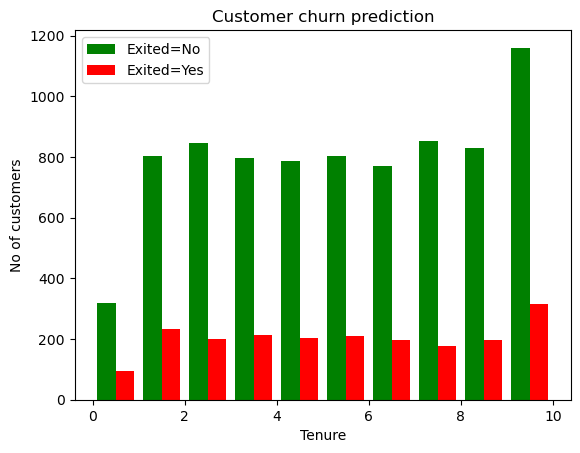

In [67]:
Ext_NO = data[data.Exited==0].Tenure
Ext_YES = data[data.Exited==1].Tenure

plt.xlabel('Tenure')
plt.ylabel('No of customers')
plt.title('Customer churn prediction')

plt.hist([Ext_NO,Ext_YES], color=['green','red'],label=['Exited=No','Exited=Yes'])
plt.legend()

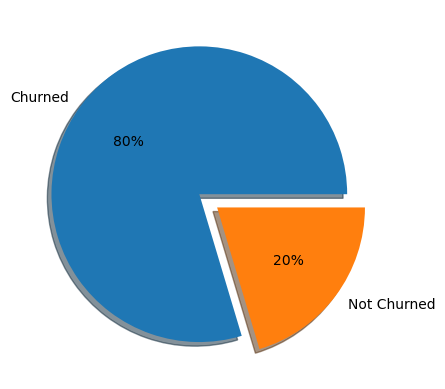

In [82]:
import matplotlib.pyplot as plt

output = data['Exited'].value_counts() #counting the number of entries for values of Exited i.e 0,1
out_labels = ['Churned','Not Churned']
out_explode = [0,0.15]

plt.pie(output, labels=out_labels, explode=out_explode, autopct='%1.0f%%',shadow=True)
plt.show()

### Gender check

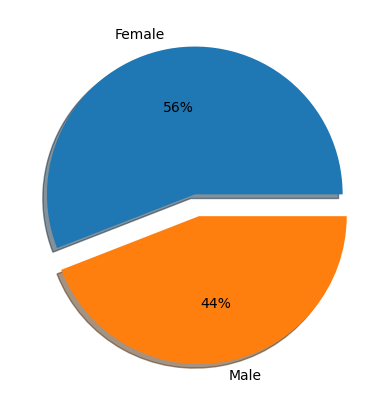

Gender
0    1139
1     898
Name: count, dtype: int64

In [83]:
df_cond = data['Exited'].values==1
df_churned = data[df_cond]          #dataset containing only churned entries
gen_count = df_churned['Gender'].value_counts()   #counting the number of entries for each gender in churned dataset
gen_labels = ['Female','Male']
gen_explode = [0,0.15]

plt.pie(gen_count, labels=gen_labels, explode=gen_explode, autopct='%1.0f%%',shadow=True)
plt.show()
gen_count

## Apply the ANN Classification model on the training dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [37]:
(X_train.shape)

(8000, 12)

### Now bulid ANN model

In [39]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'), 
    Dense(1,activation='sigmoid')
]

)

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
loss=tf.keras.losses.BinaryCrossentropy()
loss

In [43]:
## compiling the model
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

In [44]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

### Early stopping`

In [46]:
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

## Now train the model

In [49]:
history=model.fit(
    X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8635 - loss: 0.3264 - val_accuracy: 0.8625 - val_loss: 0.3477
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8773 - loss: 0.3009 - val_accuracy: 0.8570 - val_loss: 0.3512
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8778 - loss: 0.3076 - val_accuracy: 0.8630 - val_loss: 0.3515
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8741 - loss: 0.3135 - val_accuracy: 0.8615 - val_loss: 0.3447
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8657 - loss: 0.3154 - val_accuracy: 0.8600 - val_loss: 0.3500
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8724 - loss: 0.3064 - val_accuracy: 0.8590 - val_loss: 0.3608
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8746 - loss: 0.3034 - val_accuracy: 0.8595 - val_loss: 0.3671
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8771 - loss: 0.3017 - v

In [55]:
model.save('model.h5')

In [57]:
## loading tensorboard extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [60]:
%tensorboard --logdir logs/fit

## Model Evaluation

In [61]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print(y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


## Confusion Matrix & Class Report

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [63]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[1517   90]
 [ 185  208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.70      0.53      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.86      2000



###
Total correct predictions that customers stay in bank = 1564

Total correct predictions that customers leave the bank = 164

Total incorrect predictions that customers stay in the bank = 229

Total incorrect predictions that customers leave in the bank = 43

## Plotting confusion matrix

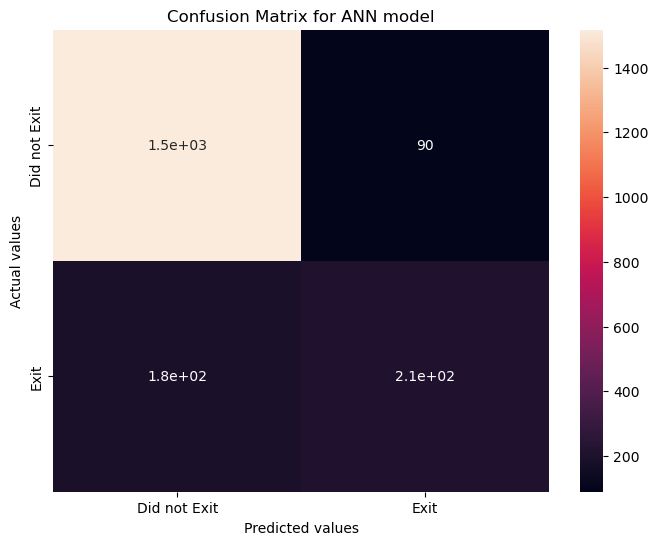

In [64]:

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

## Calculating the accuracy

In [66]:
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 86.25%


In [80]:
#### Extra

### Lets check the predictions

In [68]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
model=load_model('model.h5')

## load the encoder and scaler
with open('onehot_encoder_geo.pkl','rb') as file:
    label_encoder_geo=pickle.load(file)

with open('label_encoder_gender.pkl', 'rb') as file:
    label_encoder_gender = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [70]:
input_data = {
    'CreditScore': 600,
    'Geography': 'France',
    'Gender': 'Male',
    'Age': 40,
    'Tenure': 3,
    'Balance': 60000,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 50000
}

In [71]:
geo_encoded = label_encoder_geo.transform([[input_data['Geography']]]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded, columns=label_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0


In [72]:
input_df=pd.DataFrame([input_data])
input_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,Male,40,3,60000,2,1,1,50000


In [73]:
input_df['Gender']=label_encoder_gender.transform(input_df['Gender'])
input_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,1,40,3,60000,2,1,1,50000


In [74]:
input_df=pd.concat([input_df.drop("Geography",axis=1),geo_encoded_df],axis=1)
input_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,600,1,40,3,60000,2,1,1,50000,1.0,0.0,0.0


In [75]:
## Scaling the input data
input_scaled=scaler.transform(input_df)
input_scaled

array([[-0.53598516,  0.91324755,  0.10479359, -0.69539349, -0.25781119,
         0.80843615,  0.64920267,  0.97481699, -0.87683221,  1.00150113,
        -0.57946723, -0.57638802]])

In [76]:
## PRedict churn
prediction=model.predict(input_scaled)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


array([[0.02300894]], dtype=float32)

In [77]:
prediction_proba = prediction[0][0]

In [78]:
prediction_proba

0.023008939

In [79]:
if prediction_proba > 0.5:
    print('The customer is likely to churn.')
else:
    print('The customer is not likely to churn.')

The customer is not likely to churn.
